## 배송 내 품목데이터 가공

In [68]:
product_df.head(1)

,Order ID,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Discount_apply_Sales
0,CA-2016-152156,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2.0,0.0,41.9136,261.96


### Category컬럼 더미변수 생성

In [0]:
add_category_df = pd.get_dummies(product_df['Category'],prefix="Category")

In [70]:
add_category_df.head(1)

,Category_Furniture,Category_Office Supplies,Category_Technology
0,1,0,0


In [0]:
product_df  = pd.concat([product_df.drop(columns=["Category"]) , add_category_df],axis=1)


### Sub-Category컬럼 더미변수 생성

In [0]:
add_df = pd.get_dummies(product_df["Sub-Category"],prefix="Sub-Category")

In [0]:
product_df = pd.concat([product_df.drop(columns=["Sub-Category"]),add_df],axis=1)

### 수치형변수 데이터타입 변경

In [0]:
type_change_col_list = ["Sales","Quantity","Discount","Profit","Discount_apply_Sales"]
for col in type_change_col_list:
  product_df[col] = product_df[col].astype(np.float)

### 수치형변수 집약함수 사용

In [0]:
add_numerical_df = product_df.groupby(["Order ID"]).agg({"Product ID":"count",
                                      "Sales":["sum","mean"],
                                      "Quantity":"sum",
                                      "Discount":"sum",
                                      "Profit":"sum",
                                      "Discount_apply_Sales":"sum"

                                      })

In [0]:
product_df.drop(columns=["Product ID","Product Name","Sales","Quantity","Discount","Profit","Discount_apply_Sales"],inplace=True)

In [78]:
product_df.groupby(["Order ID"]).agg(["sum"]).head(2)

,Category_Furniture,Category_Office Supplies,Category_Technology,Sub-Category_Accessories,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Binders,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Copiers,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum
Order ID,,,,,,,,,,,,,,,,,,,,
CA-2014-100006,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
CA-2014-100090,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
product_agg_df = product_df.groupby(["Order ID"]).agg(["sum"])

In [0]:
new_col = []
for col in product_agg_df.columns.tolist():
  new_col.append("{}-{}".format(col[0] , col[1]))

In [0]:
product_agg_df.columns = new_col

In [0]:
product_agg_df.reset_index(drop=False,inplace=True)

In [83]:
product_agg_df.head(1)

,Order ID,Category_Furniture-sum,Category_Office Supplies-sum,Category_Technology-sum,Sub-Category_Accessories-sum,Sub-Category_Appliances-sum,Sub-Category_Art-sum,Sub-Category_Binders-sum,Sub-Category_Bookcases-sum,Sub-Category_Chairs-sum,Sub-Category_Copiers-sum,Sub-Category_Envelopes-sum,Sub-Category_Fasteners-sum,Sub-Category_Furnishings-sum,Sub-Category_Labels-sum,Sub-Category_Machines-sum,Sub-Category_Paper-sum,Sub-Category_Phones-sum,Sub-Category_Storage-sum,Sub-Category_Supplies-sum,Sub-Category_Tables-sum
0,CA-2014-100006,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [84]:
add_numerical_df.head(5)

Product ID    Sales          Quantity Discount    Profit Discount_apply_Sales
                    count      sum     mean      sum      sum       sum                  sum
Order ID                                                                                    
CA-2014-100006  1          377.970  377.970  3.0      0.0      109.6113  377.9700           
CA-2014-100090  2          699.192  349.596  9.0      0.4     -19.0890   559.3536           
CA-2014-100293  1          91.056   91.056   6.0      0.2      31.8696   72.8448            
CA-2014-100328  1          3.928    3.928    1.0      0.2      1.3257    3.1424             
CA-2014-100363  2          21.376   10.688   5.0      0.4      7.7192    17.1008

In [0]:
new_col = []
for col in add_numerical_df.columns.tolist():
  new_col.append("{}-{}".format(col[0] , col[1]))

In [0]:
add_numerical_df.columns = new_col

In [0]:
add_numerical_df.reset_index(drop=False,inplace=True)

In [88]:
product_agg_df.head(1)

,Order ID,Category_Furniture-sum,Category_Office Supplies-sum,Category_Technology-sum,Sub-Category_Accessories-sum,Sub-Category_Appliances-sum,Sub-Category_Art-sum,Sub-Category_Binders-sum,Sub-Category_Bookcases-sum,Sub-Category_Chairs-sum,Sub-Category_Copiers-sum,Sub-Category_Envelopes-sum,Sub-Category_Fasteners-sum,Sub-Category_Furnishings-sum,Sub-Category_Labels-sum,Sub-Category_Machines-sum,Sub-Category_Paper-sum,Sub-Category_Phones-sum,Sub-Category_Storage-sum,Sub-Category_Supplies-sum,Sub-Category_Tables-sum
0,CA-2014-100006,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [0]:
product_df = product_agg_df.merge(add_numerical_df,how="left",on=["Order ID"])

## 배송 메타정보 & 물품정보 결합

In [0]:
result_df = unique_ship_df.merge(product_df,how="left",on=["Order ID"])

## 배송일기준 Month , Day변수 추가

In [0]:
result_df["Order Month"] = result_df["Order Date"].dt.month
result_df["Order Day"] = result_df["Order Date"].dt.day

In [0]:
result_df["Postal Code"] = result_df["Postal Code"].astype(object)

In [0]:
result_df.drop(columns=["Order Date"],inplace=True)

In [0]:
result_df.drop(columns=["Order ID"],inplace=True)

In [0]:
result_df["City"] = result_df["State"] + "_" + result_df["City"] 

In [96]:
result_df["City"].head(5)

0    Kentucky_Henderson     
1    California_Los Angeles 
2    Florida_Fort Lauderdale
3    California_Los Angeles 
4    North Carolina_Concord 
Name: City, dtype: object

# 모델링

## 배송일을 타겟값으로 설정

## Train & Test셋 분할

In [0]:
train_x ,test_x, train_y,test_y = train_test_split(result_df.drop(columns=["During Date"]),result_df["During Date"], test_size=0.2,random_state = 2009 )

,Ship Mode,Segment,City,State,Postal Code,Country,Region,During Date,Ship latitude_x,Shop longitude_x,Ship latitude_y,Shop longitude_y,Category_Furniture-sum,Category_Office Supplies-sum,Category_Technology-sum,Sub-Category_Accessories-sum,Sub-Category_Appliances-sum,Sub-Category_Art-sum,Sub-Category_Binders-sum,Sub-Category_Bookcases-sum,Sub-Category_Chairs-sum,Sub-Category_Copiers-sum,Sub-Category_Envelopes-sum,Sub-Category_Fasteners-sum,Sub-Category_Furnishings-sum,Sub-Category_Labels-sum,Sub-Category_Machines-sum,Sub-Category_Paper-sum,Sub-Category_Phones-sum,Sub-Category_Storage-sum,Sub-Category_Supplies-sum,Sub-Category_Tables-sum,Product ID-count,Sales-sum,Sales-mean,Quantity-sum,Discount-sum,Profit-sum,Discount_apply_Sales-sum,Order Month,Order Day
0,Second Class,Consumer,Kentucky_Henderson,Kentucky,42420,United States,South,3,37.836751,-87.590763,37.836751,-87.590763,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,2,993.9,496.95,5.0,0.0,261.4956,993.9,11,8


## Object 타입변수 위치 설정

In [0]:
object_col_index = []
for index , col in enumerate(train_x.columns.tolist()):
  if result_df[col].dtype =="object":
    object_col_index.append(index)

## 모델 생성

In [0]:
model = CatBoostRegressor(iterations=2000 , learning_rate = 0.003, depth=4,l2_leaf_reg=3,loss_function="RMSE",eval_metric="RMSE")

## 모델 훈련

In [100]:
model.fit(train_x,train_y, cat_features=object_col_index)

0:	learn: 1.7346642	total: 58ms	remaining: 1m 55s
1:	learn: 1.7313402	total: 63.7ms	remaining: 1m 3s
2:	learn: 1.7279932	total: 69.3ms	remaining: 46.1s
3:	learn: 1.7248392	total: 76.4ms	remaining: 38.1s
4:	learn: 1.7213750	total: 80.7ms	remaining: 32.2s
5:	learn: 1.7180888	total: 86.9ms	remaining: 28.9s
6:	learn: 1.7146701	total: 92.2ms	remaining: 26.2s
7:	learn: 1.7114279	total: 97.4ms	remaining: 24.2s
8:	learn: 1.7080820	total: 102ms	remaining: 22.7s
9:	learn: 1.7046878	total: 108ms	remaining: 21.4s
10:	learn: 1.7013499	total: 112ms	remaining: 20.3s
11:	learn: 1.6982739	total: 117ms	remaining: 19.5s
12:	learn: 1.6949400	total: 123ms	remaining: 18.7s
13:	learn: 1.6916123	total: 127ms	remaining: 18s
14:	learn: 1.6884523	total: 132ms	remaining: 17.5s
15:	learn: 1.6852199	total: 137ms	remaining: 17s
16:	learn: 1.6822211	total: 143ms	remaining: 16.7s
17:	learn: 1.6790546	total: 149ms	remaining: 16.4s
18:	learn: 1.6759231	total: 153ms	remaining: 16s
19:	learn: 1.6726797	total: 158ms	remain

## 목표값 예측

In [0]:
y_pred = model.predict(test_x)

## 모델 평가

In [0]:
rmse = sqrt(mean_squared_error(y_pred, test_y))

In [103]:
rmse

0.9943143748046535

### 변수 중요도 산출

In [0]:
feature_importance_df = pd.DataFrame.from_dict(dict(zip(model.feature_names_,model.feature_importances_)),orient="index",columns=["feature_value"])

In [105]:
feature_importance_df.sort_values(by="feature_value").tail()

,feature_value
State,0.207806
Discount-sum,0.209886
Segment,2.363887
Region,2.875325
Ship Mode,91.757950


#### 중요도 산출 추가방법


[Lime_1](https://towardsdatascience.com/decrypting-your-machine-learning-model-using-lime-5adc035109b5)
[Lime_2](https://github.com/marcotcr/lime)

[Shap_1](https://data-newbie.tistory.com/254)
[Shap_2](https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d)


# 딥러닝 모델 생성

In [0]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Reshape
from keras.layers import merge
from keras.layers.embeddings import Embedding
from keras.callbacks import ModelCheckpoint

from keras.layers import add
from numpy.random import seed
from sklearn.preprocessing import scale
from keras.models import Sequential
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Dense, merge
from keras.layers.normalization import BatchNormalization




from sklearn import preprocessing
import h5py

## 일부 카테고리 , 수치형 데이터 사용

In [0]:
train_cat_x = pd.get_dummies(train_x["Ship Mode"])
test_cat_x = pd.get_dummies(test_x["Ship Mode"])

In [0]:
train_cat_x = train_cat_x.values
test_cat_x = test_cat_x.values

## 카테고리 데이터 입력모델 생성

In [0]:
cat_model = Sequential()
cat_model.add(Dense(train_cat_x.shape[1], input_shape = (train_cat_x.shape[1],), init = 'normal', activation = 'relu'))
cat_model.add(BatchNormalization())
cat_model.add(Dense(3))


## 수치형 데이터 입력모델 생성

In [0]:
use_col = ['Quantity-sum', 'Discount-sum', 'Profit-sum', 'Discount_apply_Sales-sum', 'Order Month', 'Order Day']

In [0]:
train_num_x = train_x[use_col]
test_num_x = test_x[use_col]

In [0]:
train_num_x = train_num_x.values
test_num_x = test_num_x.values

## 정규화

In [0]:
train_mean = train_num_x.mean(axis=0)
train_std = train_num_x.std(axis=0)

train_num_x = train_num_x - train_mean.reshape(-1)
train_num_x /= train_std

test_num_x = test_num_x - train_mean.reshape(-1)
test_num_x /= test_num_x

In [0]:
num_model = Sequential()
num_model.add(Dense(train_num_x.shape[1], input_shape =  (train_num_x.shape[1],), init = 'normal', activation = 'relu'))
num_model.add(BatchNormalization())
num_model.add(Dense(train_num_x.shape[1], init = 'normal', activation = 'relu'))
num_model.add(BatchNormalization())
num_model.add(Dense(train_num_x.shape[1], init = 'normal', activation = 'relu'))
num_model.add(BatchNormalization())
num_model.add(Dense(3))

## 구분된 입력모델 결합

In [0]:
merged_output = add([cat_model.output, num_model.output])

In [0]:
model_combined = Sequential()
model_combined.add(Dense(256))
model_combined.add(Activation('relu'))
model_combined.add(Dense(1))

final_model = Model([cat_model.input, num_model.input], model_combined(merged_output))

final_model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])


In [289]:
final_model.fit([train_cat_x , train_num_x], train_y,batch_size=100, epochs=100)

Epoch 1/100
4007/4007 [==============================] - 0s 36us/step - loss: nan - acc: 0.0000e+00
Epoch 2/100
4007/4007 [==============================] - 0s 32us/step - loss: nan - acc: 0.0000e+00
Epoch 3/100
4007/4007 [==============================] - 0s 31us/step - loss: nan - acc: 0.0000e+00
Epoch 4/100
4007/4007 [==============================] - 0s 29us/step - loss: nan - acc: 0.0000e+00
Epoch 5/100
4007/4007 [==============================] - 0s 33us/step - loss: nan - acc: 0.0000e+00
Epoch 6/100
4007/4007 [==============================] - 0s 34us/step - loss: nan - acc: 0.0000e+00
Epoch 7/100
4007/4007 [==============================] - 0s 31us/step - loss: nan - acc: 0.0000e+00
Epoch 8/100
4007/4007 [==============================] - 0s 26us/step - loss: nan - acc: 0.0000e+00
Epoch 9/100
4007/4007 [==============================] - 0s 31us/step - loss: nan - acc: 0.0000e+00
Epoch 10/100
4007/4007 [==============================] - 0s 32us/step - loss: nan - acc: 0.0000e+00

# 시계열 데이터 분석

## 시계열 데이터 탐색

In [0]:
df_furniture = df_order[df_order["Category"]=="Furniture"]

### 주문데이터 기간 확인

In [108]:
df_furniture['Order Date'].min(), df_furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

###  사용 컬럼을 제외한 나머지 컬럼 삭제

In [0]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
df_furniture.drop(cols, axis=1, inplace=True)

### Order Date 기준으로 Sorting

In [0]:
df_furniture.sort_values(by="Order Date",ascending=False,inplace=True)

### 데이터 타입 변환

In [0]:
df_furniture["Sales"] = df_furniture["Sales"].astype(np.float)
df_furniture["Order Date"] = pd.to_datetime(df_furniture["Order Date"])

### 날짜 기준으로 당일 판매 총액 데이터 생성

In [0]:
df_furniture = df_furniture.groupby('Order Date')['Sales'].sum().reset_index(drop=False)

### 시계열 데이터로 다루기 위해 날짜데이터 인덱스 설정

In [113]:
df_furniture = df_furniture.set_index('Order Date')
df_furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11', '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19', '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28', '2017-12-29', '2017-12-30'], dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [114]:
df_furniture.head(3)

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940


### 데이터 주기를 재설정

In [0]:
y = df_furniture.resample('MS').mean()["Sales"]

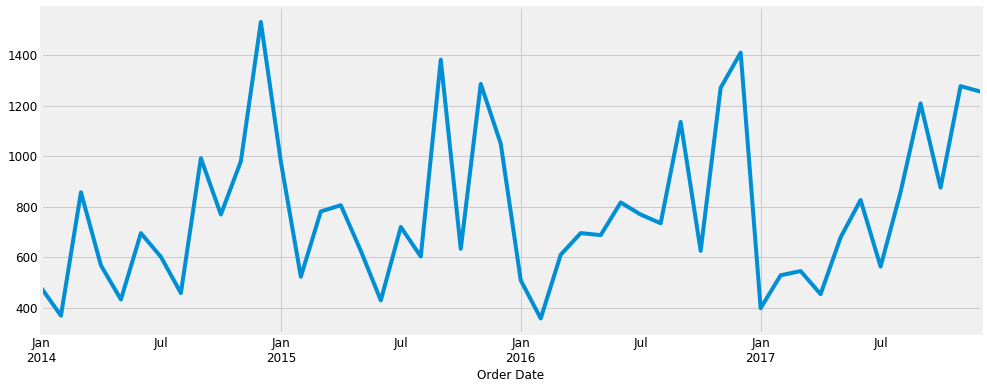

In [116]:
y.plot(figsize=(15, 6))
plt.show()

###Cycle(주기)
- 주기를 자기상관(autocorrelation)으로 정의하기도 한다. 자기상관은
각 시점간의 상관 관계를 의미하며 일정 기간 증가하거나 감소하는 경우 양의 자기상관이 존재한다고 하고 시점마다 증감이 반복되는 경우 이를 음의
자기상관이라 한다. 

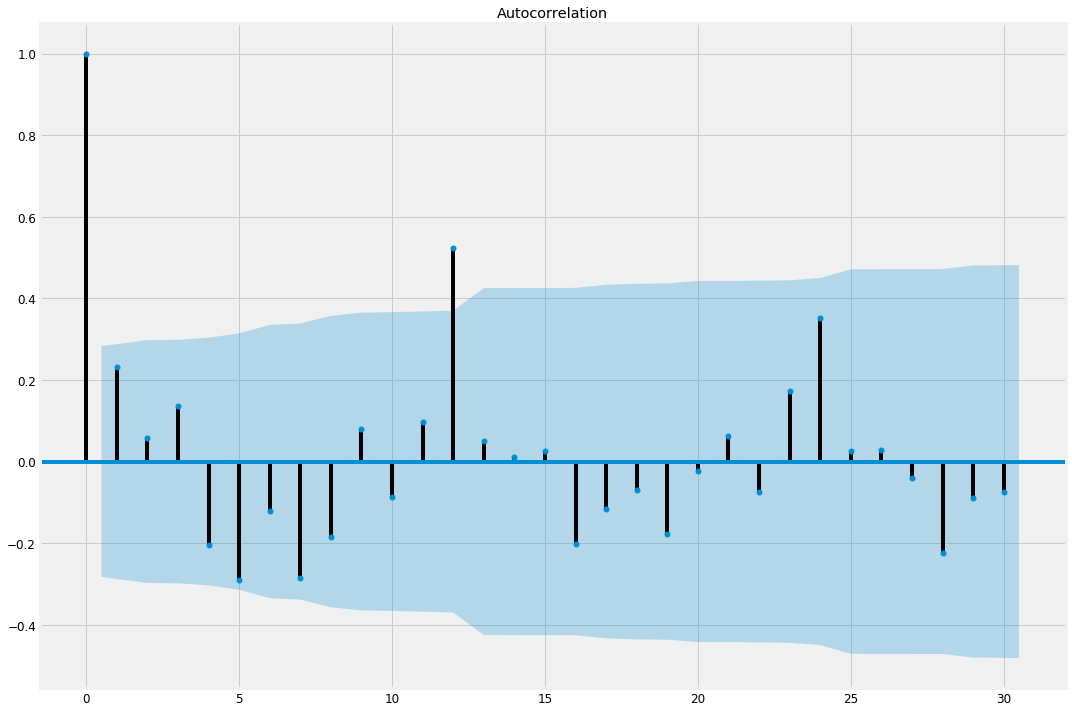

In [117]:
lags=30
fig = plt.figure(figsize=(15,10))
layout = (1,2)
acf_ax = plt.subplot2grid(layout, (0,0),colspan=2)
smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
plt.tight_layout()

### Seasonality(계절성) 
- 계절성은 주기적 변동을 나타냅니다. 
- 일년중 2월과 8월에 원룸 대학가 주변의 원룸계약건수가 높거나 , 대형마트의 물건판매량이 7~9시에 높아진것을 예로들수 있습니다.

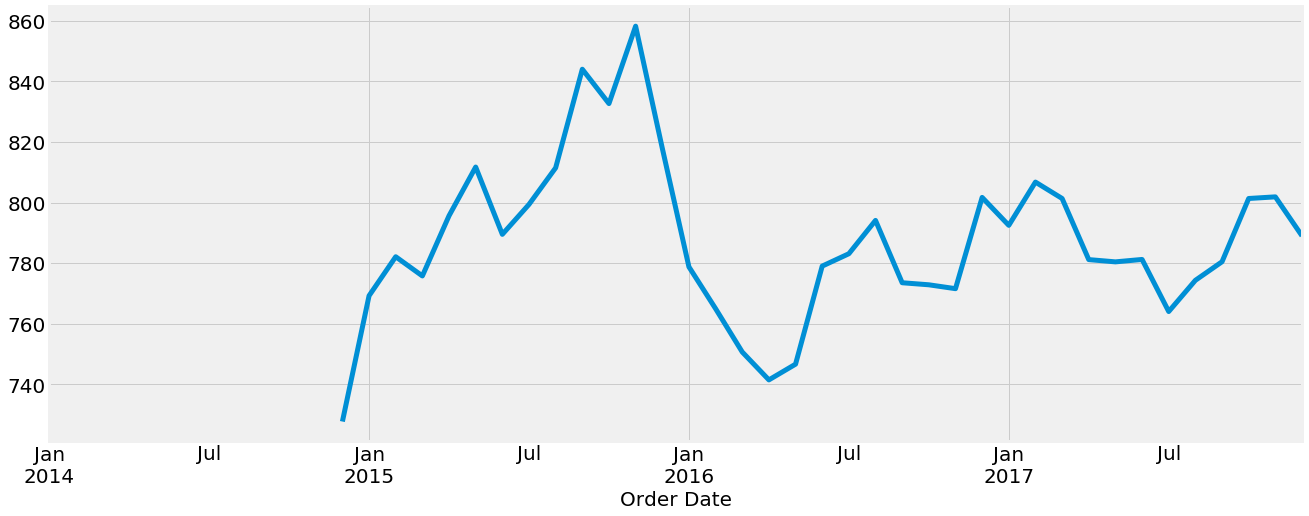

In [118]:
y.rolling(12).mean().plot(figsize=(20,8), linewidth=5, fontsize=20)
plt.xlabel('Order Date', fontsize=20);

### Stationarity
- Stationarity성은 시계열의 중요한 특성입니다. 시계열데이터가 Stationarity하다는 것은 시간이 변해도 평균과 분산은 일정합니다.
- 고전 시계열 모델은 Stationarity조건을 가정하는 경우가 많습니다.

#### Augmented Dickey-Fuller test
- 귀무 가설 (H0) : 시간 t의 변화에 따라 분산이 무한대로 발산
- 대립 가설 (H1) : 시간 t의 변화에 따라 평균 , 분산이 변하지 않음.
- p-value> 0.05 : 귀무 가설 (H0)을 기각 할 수 없습니다. Stationarity하지 않습니다.
- p-value <= 0.05 : 귀무 가설 (H0)을 기각합니다. Stationarity상태입니다.

In [119]:
print("adf 검정통계량 : {0:.5f}".format(sm.tsa.stattools.adfuller(y)[0]))
print("p-value : {0:.5f}".format(sm.tsa.stattools.adfuller(y)[1]))

adf 검정통계량 : -5.19107
p-value : 0.00001


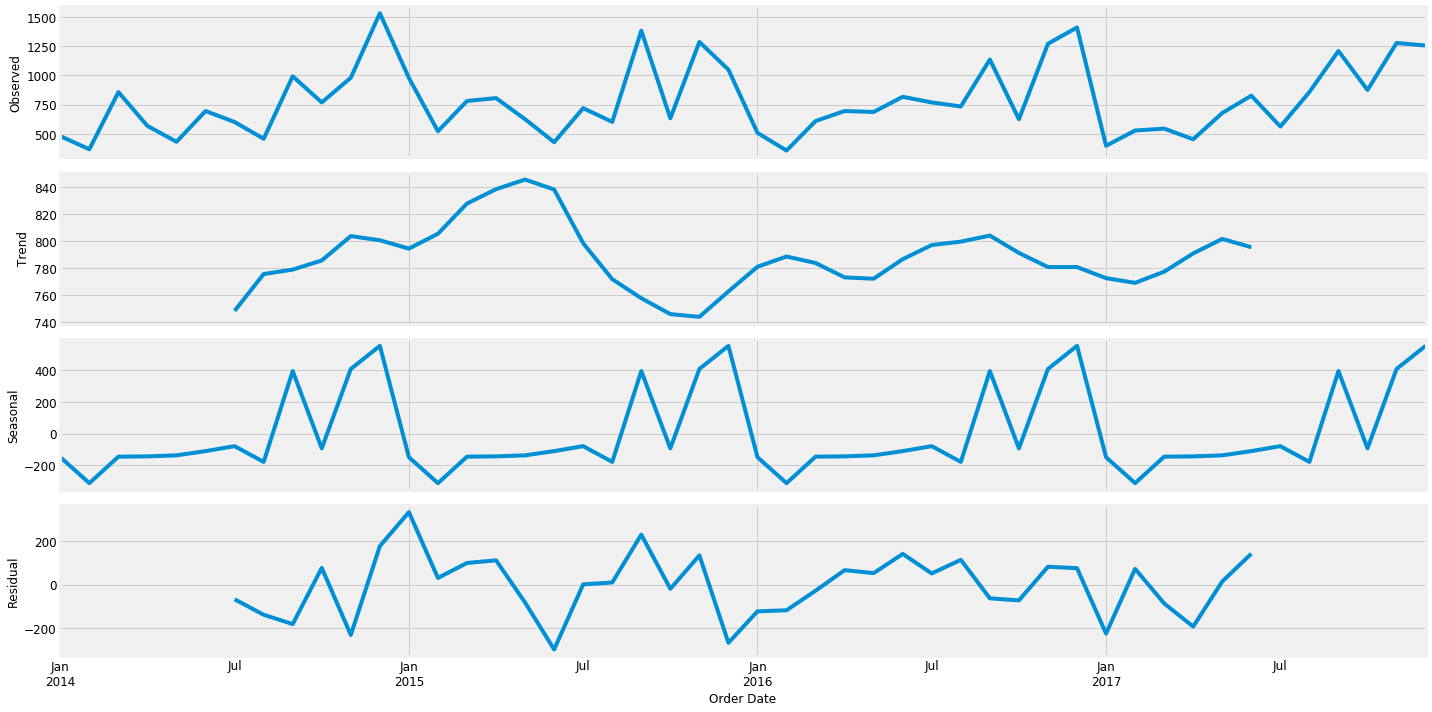

In [120]:
# 시계열 덧셈 분해 후 Trend /  Seasonal / Residual 로 구분
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

## 시계열 전처리
- [결측치 처리](https://towardsdatascience.com/how-to-interpolate-time-series-data-in-apache-spark-and-python-pandas-part-1-pandas-cff54d76a2ea)
- [이상치 탐지](#https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Time%20Series%20of%20Price%20Anomaly%20Detection%20Expedia.ipynb)


## 시계열 모델링

- Moving average(이동평균)

- Exponential smoothing(지수 평활화)

- ARIMA

- SARIMA

### 이동평균(Moving average)

- 이동 평균 모델은 가장 기본적인 접근방법입니다. 이 모델은 단순히 다음 관측치가 모든 과거 관측치의 평균임을 나타냅니다. 
- 단순하지만 모델은 생각보다 좋은 결과를 나타낼 수 있습니다.


In [0]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)
    

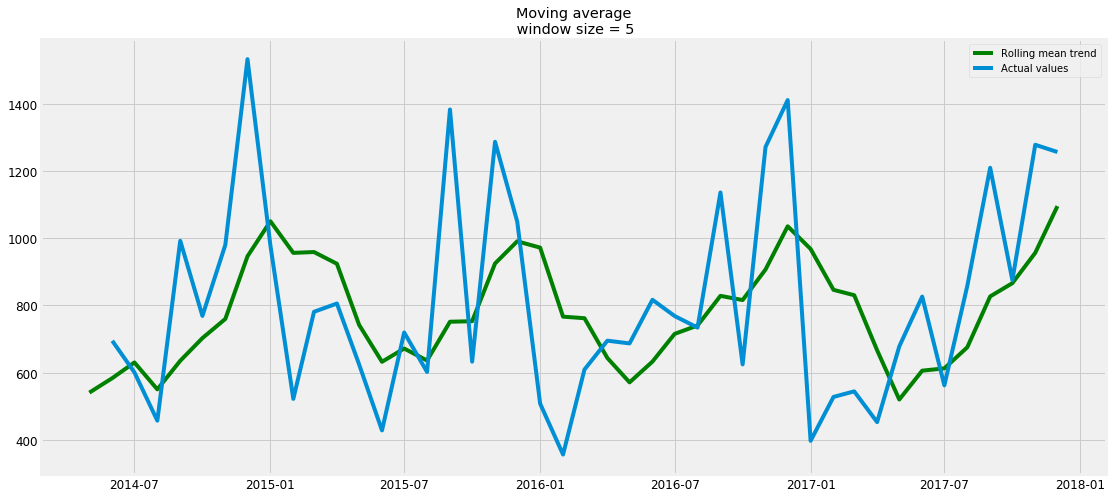

In [122]:


plot_moving_average(y, 5)

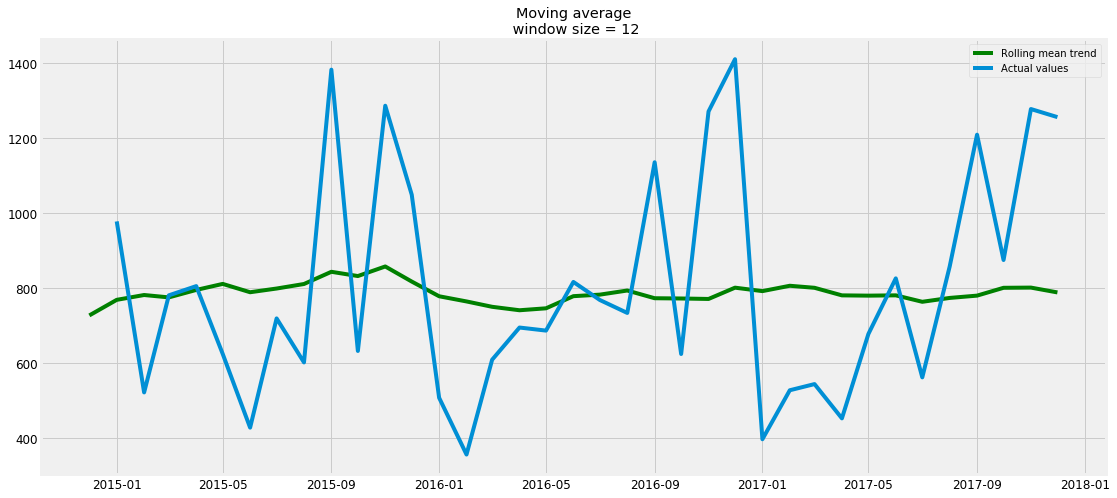

In [123]:
plot_moving_average(y, 12)

### 지수평활(Exponential smoothing)
- 지수평활은 이동 평균과 유사한 논리를 사용하지만 각 관측치에 다른 감소 가중치가 할당됩니다 . 다시 말해, 현재에서 멀어질수록 관측에 대한 중요성이 줄어듭니다.
- 평활 계수가 작을수록 시계열이 더 매끄러워집니다. 평활계수가 0에 가까워질수록 이동 평균 모델에 접근합니다.
- 여기서 알파는 0과 1 사이의 값을 취하는 평활화 요소입니다. 이전 관측치의 가중치가 얼마나 빨리 감소하는지를 결정합니다.
- 평활 계수가 작을수록 시계열이 더 매끄러워집니다. 평활계수가 0에 가까워질수록 이동 평균 모델에 접근합니다

In [0]:
def exponential_smoothing(series, alpha):

    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result
def plot_exponential_smoothing(series, alphas):
 
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True);

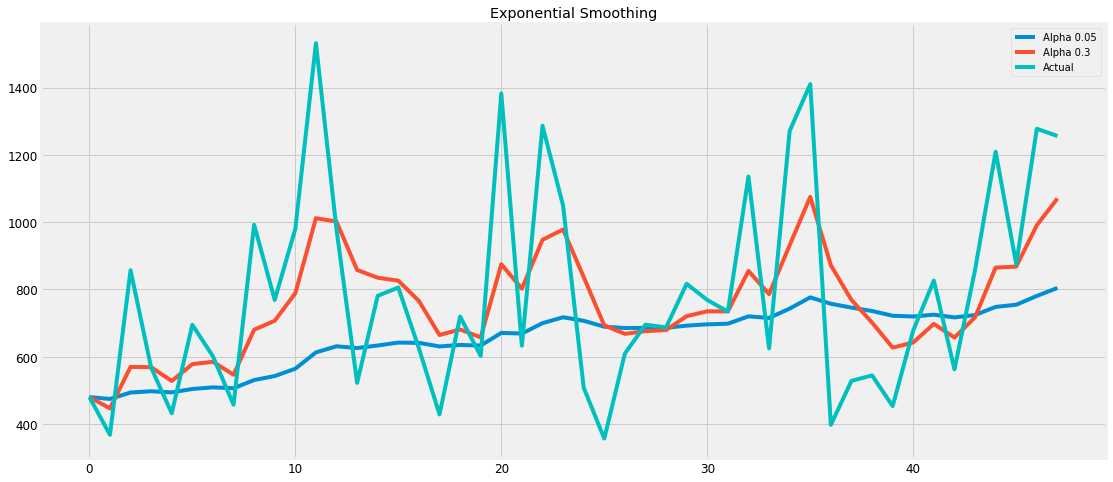

In [125]:
# 알파는 0~1 사이의 값을 취하는 평활화 요소입니다.
plot_exponential_smoothing(y, [0.05, 0.3])

### ARIMA(Autoregressive integrated moving average)

- ARIMA는 자기회귀와 이동평균을 둘 다 고려하는 모형인데, ARMA와 ARIMA의 차이점은 ARIMA의 경우 시계열의 비정상성(Non-stationary)을 설명하기 위해 관측치간의 차분(Diffrance)을 사용한다는 차이점이 있다.
- Parameter를 직접 설정해줄수 있지만 입력값이 3개이므로 모델을 각각 계산한 뒤 AIC값을 기준으로 최종모델을 선정

In [0]:
p = d = q =  range(0,2)
parameter_list = list(itertools.product(p,q,d))

In [0]:
def get_optimal_params(y):

    param_dict = {}
    for param in parameter_list:
        try:
            model = ARIMA(y, order=param)
            results_ARIMA = model.fit(disp=-1)
            param_dict[results_ARIMA.aic] = param
        except:
            continue

    min_aic = min(param_dict.keys())
    optimal_params = param_dict[min_aic]
    return optimal_params

In [0]:
model = ARIMA(y, order=get_optimal_params(y)) # AIC를 최소화하는 최적의 파라미터로 모델링합니다.
ARIMA_fit = model.fit(trend='nc',full_output=True, disp=1)

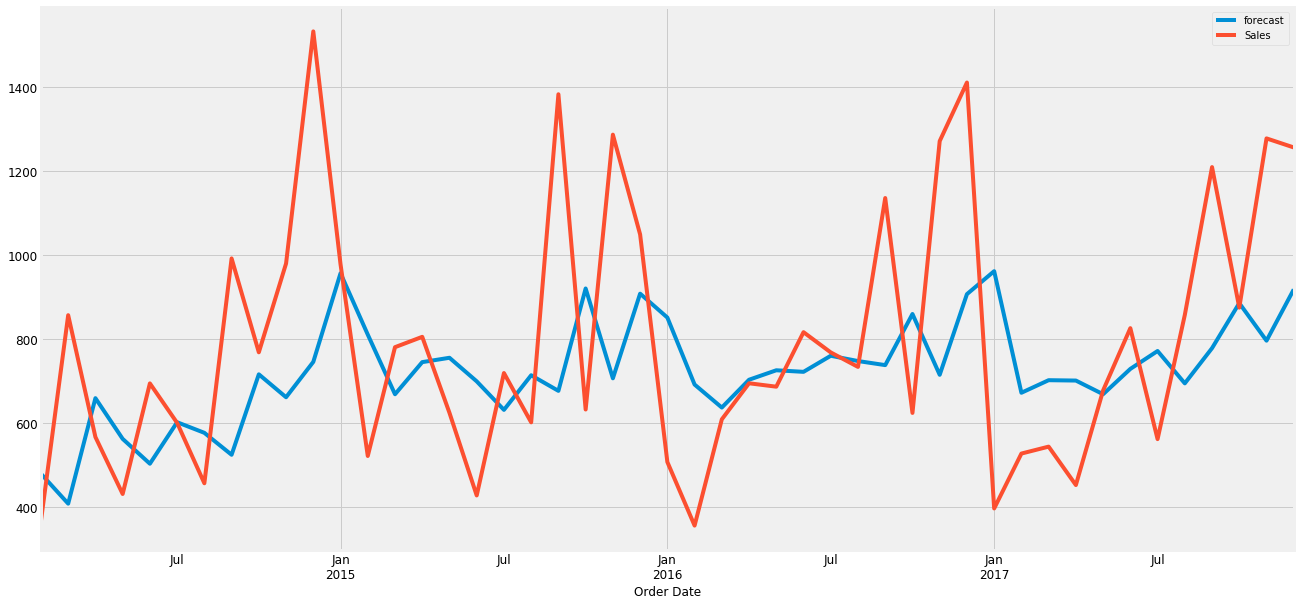

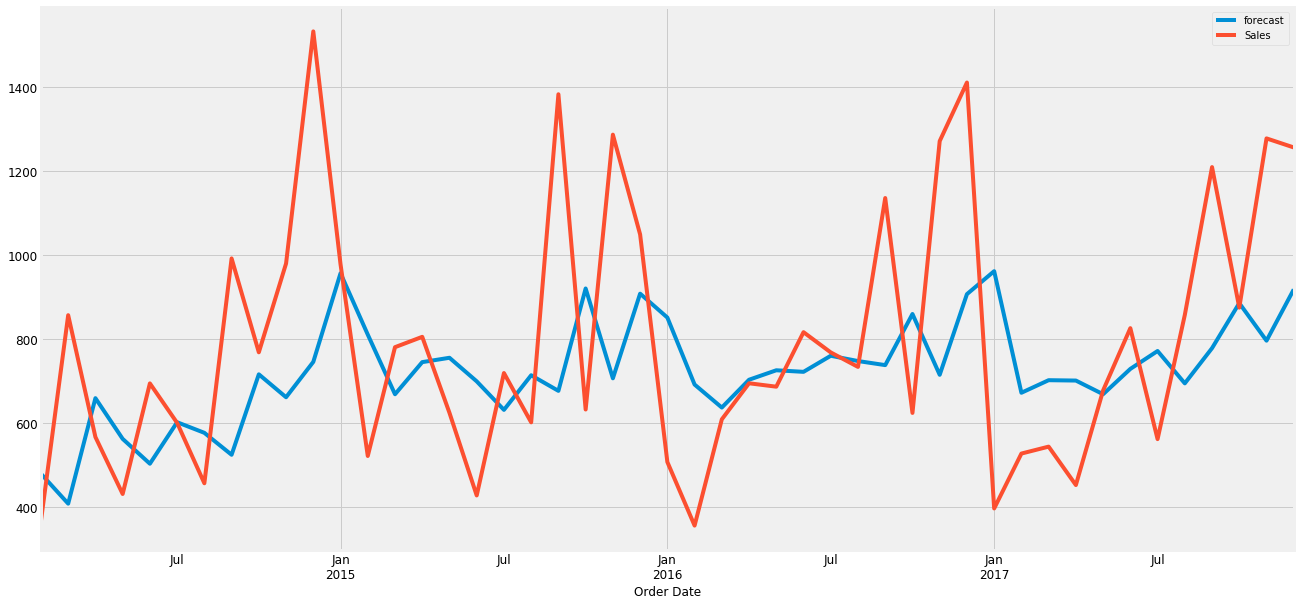

In [129]:
ARIMA_fit.plot_predict()

In [131]:
forecast = ARIMA_fit.forecast(steps=1)
# 순서대로 예측값, 편차 , 하한선 , 상한선
print(forecast[0])

[921.56364498]


### SARIMAX(계절성 ARIMA모델)

In [132]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [133]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
            results = mod.fit()
            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue


SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205916
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1433.5836068474935
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.7170130920218
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.2314433418338
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1160.1384761332456
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.925227075812
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2973.9449681338892
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.5607429809139
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.55575489816766
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2483.497399265227
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.9884876946869
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.894766843944
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1389.4576828258591
SARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:486.637856717789
SARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.7889663004408
SARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1287.32794479335
SARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:319.77140

In [0]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()


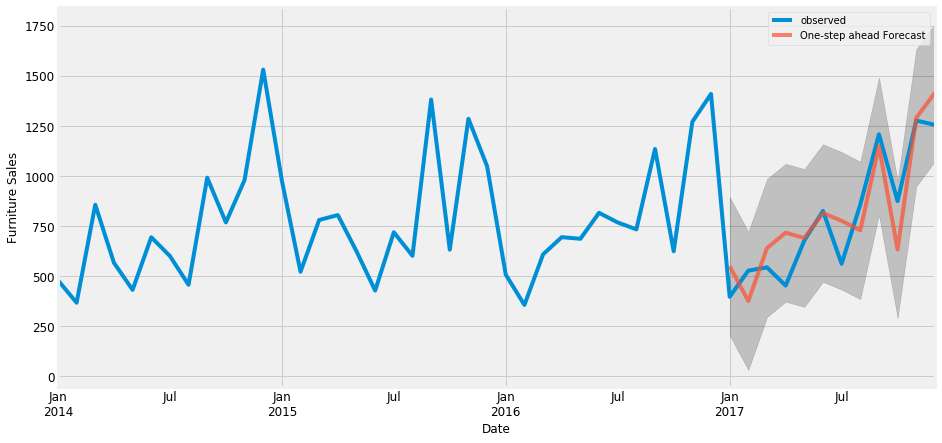

In [135]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

### Prophet

In [0]:
from fbprophet import Prophet
prophet_input_df = pd.DataFrame(y)
prophet_input_df.reset_index(drop=False,inplace=True)
prophet_input_df.rename(columns={"Order Date":"ds","Sales":"y"},inplace=True)

#### Prophet 예측

In [138]:
m = Prophet()
m.fit(prophet_input_df)
future = m.make_future_dataframe(periods=12,freq="MS")
future.tail()

forecast = m.predict(future)
forecast.tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
55,2018-08-01,803.572098,523.558866,836.523132,803.572093,803.572103,-117.154950,-117.154950,-117.154950,-117.154950,-117.154950,-117.154950,0.0,0.0,0.0,686.417148
56,2018-09-01,805.008408,1109.969675,1424.559563,805.008401,805.008414,461.565905,461.565905,461.565905,461.565905,461.565905,461.565905,0.0,0.0,0.0,1266.574313
57,2018-10-01,806.398384,628.825283,941.521096,806.398377,806.398392,-28.820414,-28.820414,-28.820414,-28.820414,-28.820414,-28.820414,0.0,0.0,0.0,777.577970
58,2018-11-01,807.834694,1092.481351,1397.530223,807.834685,807.834703,431.055221,431.055221,431.055221,431.055221,431.055221,431.055221,0.0,0.0,0.0,1238.889915
59,2018-12-01,809.224671,1142.371243,1465.390828,809.224661,809.224681,501.882316,501.882316,501.882316,501.882316,501.882316,501.882316,0.0,0.0,0.0,1311.106987


#### Prophet 시각화

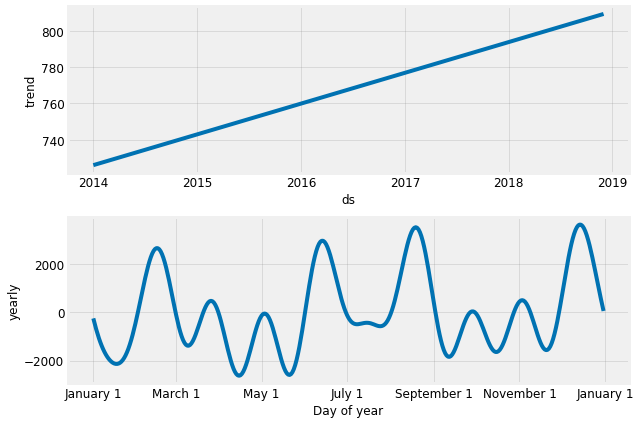

In [140]:
fig = m.plot_components(forecast)

### Prophet을 이용한 실습

### RNN 모델링

In [169]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data)-look_back):
        dataX.append(signal_data[i:(i+look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 12




# 데이터 전처리
signal_data = y.values
scaler = MinMaxScaler(feature_range=(0, 1))
signal_data = np.reshape(signal_data ,(-1,1))
signal_data = scaler.fit_transform(signal_data)


# 데이터 분리
train = signal_data[0:30]
test = signal_data[30:]

# 데이터셋 생성
x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)




# 데이터셋 전처리
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# 모델 구성하기
model = Sequential()
model.add(LSTM(32, input_shape=(None, 1)))
model.add(Dropout(0.3))
model.add(Dense(1))

# 모델 학습과정 설정하기
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 학습시키기
history = model.fit(x_train, y_train, epochs=200, batch_size=32)



# 모델 예측

xhat = x_test[0]
prediction = model.predict(np.array([xhat]), batch_size=1)

Epoch 1/200
18/18 [==============================] - 1s 47ms/step - loss: 0.2179
Epoch 2/200
18/18 [==============================] - 0s 896us/step - loss: 0.1981
Epoch 3/200
18/18 [==============================] - 0s 707us/step - loss: 0.1863
Epoch 4/200
18/18 [==============================] - 0s 756us/step - loss: 0.1705
Epoch 5/200
18/18 [==============================] - 0s 834us/step - loss: 0.1785
Epoch 6/200
18/18 [==============================] - 0s 790us/step - loss: 0.1576
Epoch 7/200
18/18 [==============================] - 0s 732us/step - loss: 0.1429
Epoch 8/200
18/18 [==============================] - 0s 700us/step - loss: 0.1309
Epoch 9/200
18/18 [==============================] - 0s 722us/step - loss: 0.1299
Epoch 10/200
18/18 [==============================] - 0s 699us/step - loss: 0.1029
Epoch 11/200
18/18 [==============================] - 0s 731us/step - loss: 0.1044
Epoch 12/200
18/18 [==============================] - 0s 707us/step - loss: 0.0982
Epoch 13/200
1

(12, 1)

In [171]:
scaler.inverse_transform(prediction)

array([[823.4405]], dtype=float32)

# 시계열 데이터를 이용한 자동 트레이딩

## Pyalgotrade 패키지 설치 및 필요 데이터 다운로드

In [142]:
! pip install pyalgotrade
! python -m "pyalgotrade.tools.quandl" --source-code="WIKI" --table-code="AAPL" --from-year=2010 --to-year=2012 --storage=. --force-download --frequency=daily

     |████████████████████████████████| 92kB 4.1MB/s 
     |████████████████████████████████| 61kB 6.6MB/s 
  Created wheel for pyalgotrade: filename=PyAlgoTrade-0.20-cp36-none-any.whl size=159542 sha256=8e08a2fc98feb1fbcb954c28ac15cf243a4c524394ffbac147ac61e92c574157
  Stored in directory: /root/.cache/pip/wheels/12/b8/69/31e68bb2e66b8003d95ca66578721957a5f6c647363ee16cf2
  Created wheel for ws4py: filename=ws4py-0.5.1-cp36-none-any.whl size=45215 sha256=3c59d18c3e1f829c63d4bb6bf6ae006608136c91a0ed069cc1745937725bae37
  Stored in directory: /root/.cache/pip/wheels/a2/6e/4e/8b0ae12fb9b8a05715256952cf7609a8ab86285fab99b88c68
Successfully built pyalgotrade ws4py
2019-11-15 13:38:08,852 quandl [INFO] Downloading AAPL 2010 to ./WIKI-AAPL-2010-quandl.csv
2019-11-15 13:38:09,812 quandl [INFO] Downloading AAPL 2011 to ./WIKI-AAPL-2011-quandl.csv
2019-11-15 13:38:10,748 quandl [INFO] Downloading AAPL 2012 to ./WIKI-AAPL-2012-quandl.csv


## 백테스팅 및 데이터 입력포맷 설정

In [0]:
from pyalgotrade import strategy
from pyalgotrade.barfeed import quandlfeed

## 일일 종가 데이터 단순 출력

In [144]:
class MyStrategy(strategy.BacktestingStrategy):
    def __init__(self, feed, instrument):
        super(MyStrategy, self).__init__(feed)
        self.__instrument = instrument

    def onBars(self, bars):
        bar = bars[self.__instrument]
        self.info(bar.getClose())

# CSV파일을 호출해 bar형태의 데이터로 변환
feed = quandlfeed.Feed()
feed.addBarsFromCSV("aapl", "WIKI-AAPL-2012-quandl.csv")


myStrategy = MyStrategy(feed, "aapl")
myStrategy.run()

INFO:strategy:411.23
2012-01-03 00:00:00 strategy [INFO] 411.23
INFO:strategy:413.44
2012-01-04 00:00:00 strategy [INFO] 413.44
INFO:strategy:418.03
2012-01-05 00:00:00 strategy [INFO] 418.03
INFO:strategy:422.4
2012-01-06 00:00:00 strategy [INFO] 422.4
INFO:strategy:421.73
2012-01-09 00:00:00 strategy [INFO] 421.73
INFO:strategy:423.24
2012-01-10 00:00:00 strategy [INFO] 423.24
INFO:strategy:422.55
2012-01-11 00:00:00 strategy [INFO] 422.55
INFO:strategy:421.39
2012-01-12 00:00:00 strategy [INFO] 421.39
INFO:strategy:419.81
2012-01-13 00:00:00 strategy [INFO] 419.81
INFO:strategy:424.7
2012-01-17 00:00:00 strategy [INFO] 424.7
INFO:strategy:429.11
2012-01-18 00:00:00 strategy [INFO] 429.11
INFO:strategy:427.75
2012-01-19 00:00:00 strategy [INFO] 427.75
INFO:strategy:420.3
2012-01-20 00:00:00 strategy [INFO] 420.3
INFO:strategy:427.409
2012-01-23 00:00:00 strategy [INFO] 427.409
INFO:strategy:420.41
2012-01-24 00:00:00 strategy [INFO] 420.41
INFO:strategy:446.66
2012-01-25 00:00:00 str

## 이동평균 및 투자지표 추가

[RSI지표](https://ko.wikipedia.org/wiki/RSI_(%ED%88%AC%EC%9E%90%EC%A7%80%ED%91%9C))

[이동평균](http://ecodemy.cafe24.com/ave.html)

In [145]:
from pyalgotrade.technical import ma
from pyalgotrade.technical import rsi
    
    
def safe_round(value, digits):
    if value is not None:
        value = round(value, digits)
    return value


class MyStrategy(strategy.BacktestingStrategy):
    def __init__(self, feed, instrument):
        super(MyStrategy, self).__init__(feed)
        self.__rsi = rsi.RSI(feed[instrument].getCloseDataSeries(), 14)
        self.__sma = ma.SMA(self.__rsi, 15)
        self.__instrument = instrument

    def onBars(self, bars):
        bar = bars[self.__instrument]
        self.info("%s %s %s" % (
            bar.getClose(), safe_round(self.__rsi[-1], 2), safe_round(self.__sma[-1], 2)
        ))


# Load the bar feed from the CSV file
feed = quandlfeed.Feed()
feed.addBarsFromCSV("aapl", "WIKI-AAPL-2012-quandl.csv")

# Evaluate the strategy with the feed's bars.
myStrategy = MyStrategy(feed, "aapl")
myStrategy.run()

INFO:strategy:411.23 None None
2012-01-03 00:00:00 strategy [INFO] 411.23 None None
INFO:strategy:413.44 None None
2012-01-04 00:00:00 strategy [INFO] 413.44 None None
INFO:strategy:418.03 None None
2012-01-05 00:00:00 strategy [INFO] 418.03 None None
INFO:strategy:422.4 None None
2012-01-06 00:00:00 strategy [INFO] 422.4 None None
INFO:strategy:421.73 None None
2012-01-09 00:00:00 strategy [INFO] 421.73 None None
INFO:strategy:423.24 None None
2012-01-10 00:00:00 strategy [INFO] 423.24 None None
INFO:strategy:422.55 None None
2012-01-11 00:00:00 strategy [INFO] 422.55 None None
INFO:strategy:421.39 None None
2012-01-12 00:00:00 strategy [INFO] 421.39 None None
INFO:strategy:419.81 None None
2012-01-13 00:00:00 strategy [INFO] 419.81 None None
INFO:strategy:424.7 None None
2012-01-17 00:00:00 strategy [INFO] 424.7 None None
INFO:strategy:429.11 None None
2012-01-18 00:00:00 strategy [INFO] 429.11 None None
INFO:strategy:427.75 None None
2012-01-19 00:00:00 strategy [INFO] 427.75 None N

## 단순이동평균 비교를 이용한 거래전략

In [146]:
class MyStrategy(strategy.BacktestingStrategy):
    def __init__(self, feed, instrument, smaPeriod):
        super(MyStrategy, self).__init__(feed, 1000)
        self.__position = None
        self.__instrument = instrument
        # We'll use adjusted close values instead of regular close values.
        self.setUseAdjustedValues(True)
        # 단순 이동평균 전략
        self.__sma = ma.SMA(feed[instrument].getPriceDataSeries(), smaPeriod)

    def onEnterOk(self, position):
        # 주식 매수시 사용 함수
        execInfo = position.getEntryOrder().getExecutionInfo()
        # self.info("BUY at $%.2f" % (execInfo.getPrice()))

    def onEnterCanceled(self, position):
        # 주식 매수 취소 함수
        self.__position = None

    def onExitOk(self, position):
        # 주식 매도시 사용 함수
        execInfo = position.getExitOrder().getExecutionInfo()
        # self.info("SELL at $%.2f" % (execInfo.getPrice()))
        self.__position = None

    def onExitCanceled(self, position):
        # If the exit was canceled, re-submit it.

        self.__position.exitMarket()

    def onBars(self, bars):
        # Wait for enough bars to be available to calculate a SMA.
        # 가장 최근 단순 이동평균 호출
        if self.__sma[-1] is None:
            return

        bar = bars[self.__instrument]
        # If a position was not opened, check if we should enter a long position.
        if self.__position is None:
          # 현재 가격이 최근 15일의 단순이동평균보다 높으면 주식을 구매
            if bar.getPrice() > self.__sma[-1]:
                
                # 위의 조건을 만족하면 10개 주 매수
                self.__position = self.enterLong(self.__instrument, 10, True)
        # 현대 가격이 이동평균 가격보다 낮으면 장 종료
        elif bar.getPrice() < self.__sma[-1] and not self.__position.exitActive():
            self.__position.exitMarket()


def run_strategy(smaPeriod):
    # Load the bar feed from the CSV file
    feed = quandlfeed.Feed()
    feed.addBarsFromCSV("aapl", "WIKI-AAPL-2012-quandl.csv")

    # Evaluate the strategy with the feed.
    myStrategy = MyStrategy(feed, "aapl", smaPeriod)
    myStrategy.run()
    print("Final portfolio value: $%.2f" % myStrategy.getBroker().getEquity())

run_strategy(15)

Final portfolio value: $1193.36


## 최적 이동평균 기간

In [148]:
for i in range(10, 30):
    print(i)
    run_strategy(i)

10
Final portfolio value: $1176.26
11
Final portfolio value: $1179.31
12
Final portfolio value: $1143.18
13
Final portfolio value: $1138.00
14
Final portfolio value: $1198.90
15
Final portfolio value: $1193.36
16
Final portfolio value: $1209.94
17
Final portfolio value: $1178.95
18
Final portfolio value: $1166.16
19
Final portfolio value: $1172.84
20
Final portfolio value: $1143.61
21
Final portfolio value: $1160.42
22
Final portfolio value: $1167.96
23
Final portfolio value: $1157.01
24
Final portfolio value: $1100.90
25
Final portfolio value: $1054.16
26
Final portfolio value: $1060.40
27
Final portfolio value: $1047.73
28
Final portfolio value: $1036.71
29
Final portfolio value: $1024.38


In [353]:
def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data)-look_back):
        dataX.append(signal_data[i:(i+look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 15




# 데이터 전처리
signal_data = y.values
scaler = MinMaxScaler(feature_range=(0, 1))
signal_data = np.reshape(signal_data ,(-1,1))
signal_data = scaler.fit_transform(signal_data)


# 데이터 분리
train = signal_data[0:30]
test = signal_data[30:]

# 데이터셋 생성
x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)




# 데이터셋 전처리
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# 모델 구성하기
model = Sequential()
model.add(LSTM(32, input_shape=(None, 1)))
model.add(Dropout(0.3))
model.add(Dense(1))

# 모델 학습과정 설정하기
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 학습시키기
history = model.fit(x_train, y_train, epochs=200, batch_size=32)



# 모델 예측

xhat = x_test[0]
prediction = model.predict(np.array([xhat]), batch_size=1)

AttributeError: ignored

In [354]:
! python -m "pyalgotrade.tools.quandl" --source-code="WIKI" --table-code="AAPL" --from-year=2000 --to-year=2011 --storage=. --force-download --frequency=daily

2019-11-15 18:48:00,849 quandl [INFO] Downloading AAPL 2000 to ./WIKI-AAPL-2000-quandl.csv
2019-11-15 18:48:01,709 quandl [INFO] Downloading AAPL 2001 to ./WIKI-AAPL-2001-quandl.csv
2019-11-15 18:48:02,600 quandl [INFO] Downloading AAPL 2002 to ./WIKI-AAPL-2002-quandl.csv
2019-11-15 18:48:03,394 quandl [INFO] Downloading AAPL 2003 to ./WIKI-AAPL-2003-quandl.csv
2019-11-15 18:48:04,246 quandl [INFO] Downloading AAPL 2004 to ./WIKI-AAPL-2004-quandl.csv
2019-11-15 18:48:05,081 quandl [INFO] Downloading AAPL 2005 to ./WIKI-AAPL-2005-quandl.csv
2019-11-15 18:48:05,895 quandl [INFO] Downloading AAPL 2006 to ./WIKI-AAPL-2006-quandl.csv
2019-11-15 18:48:06,760 quandl [INFO] Downloading AAPL 2007 to ./WIKI-AAPL-2007-quandl.csv
2019-11-15 18:48:07,588 quandl [INFO] Downloading AAPL 2008 to ./WIKI-AAPL-2008-quandl.csv
2019-11-15 18:48:08,438 quandl [INFO] Downloading AAPL 2009 to ./WIKI-AAPL-2009-quandl.csv
2019-11-15 18:48:09,302 quandl [INFO] Downloading AAPL 2010 to ./WIKI-AAPL-2010-quandl.csv

In [0]:
for i in range(2000, 2012):
  if i == 2000:
    df = pd.read_csv("/content/WIKI-AAPL-{}-quandl.csv".format(i))
  else:
    add_df = pd.read_csv("/content/WIKI-AAPL-{}-quandl.csv".format(i))
    df = pd.concat([df,add_df],axis=0)

In [0]:
df.sort_values(by="Date",inplace=True)

In [0]:
y = df["Adj. Close"].values

In [0]:
signal_data = y
scaler = MinMaxScaler(feature_range=(0, 1))
signal_data = np.reshape(signal_data ,(-1,1))
signal_data = scaler.fit_transform(signal_data)

15

In [0]:
x_train, y_train = create_dataset(train, look_back)

In [0]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [0]:
model = Sequential()
model.add(LSTM(32, input_shape=(None, 1)))
model.add(Dropout(0.3))
model.add(Dense(1))

In [0]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [364]:
model.fit(x_train, y_train, epochs=200, batch_size=32)

Epoch 1/200
15/15 [==============================] - 2s 116ms/step - loss: 0.1595
Epoch 2/200
15/15 [==============================] - 0s 2ms/step - loss: 0.1501
Epoch 3/200
15/15 [==============================] - 0s 1ms/step - loss: 0.1414
Epoch 4/200
15/15 [==============================] - 0s 976us/step - loss: 0.1554
Epoch 5/200
15/15 [==============================] - 0s 919us/step - loss: 0.1229
Epoch 6/200
15/15 [==============================] - 0s 952us/step - loss: 0.1242
Epoch 7/200
15/15 [==============================] - 0s 935us/step - loss: 0.1232
Epoch 8/200
15/15 [==============================] - 0s 931us/step - loss: 0.1232
Epoch 9/200
15/15 [==============================] - 0s 903us/step - loss: 0.0944
Epoch 10/200
15/15 [==============================] - 0s 939us/step - loss: 0.0894
Epoch 11/200
15/15 [==============================] - 0s 901us/step - loss: 0.0946
Epoch 12/200
15/15 [==============================] - 0s 877us/step - loss: 0.0755
Epoch 13/200
15/1